In [1]:
import pandas as pd

In [2]:
#!pip install scikit-learn

In [3]:
# Load the downloaded data

nifty_data = pd.read_csv("nifty_10_years.csv")

nifty_data = nifty_data.iloc[2:]

nifty_data.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
nifty_data.set_index("Date", inplace=True)

nifty_data

,Open,High,Low,Close,Volume
Date,,,,,
2013-01-02,5982.60009765625,6006.0498046875,5982.0,5993.25,0
2013-01-03,6015.7998046875,6017.0,5986.5498046875,6009.5,0
2013-01-04,6011.9501953125,6020.75,5981.5498046875,6016.14990234375,0
2013-01-07,6042.14990234375,6042.14990234375,5977.14990234375,5988.39990234375,0
2013-01-08,5983.4501953125,6007.0498046875,5964.39990234375,6001.7001953125,0
...,...,...,...,...,...
2023-12-22,21295.849609375,21390.5,21232.44921875,21349.400390625,284700
2023-12-26,21365.19921875,21477.150390625,21329.44921875,21441.349609375,219500
2023-12-27,21497.650390625,21675.75,21495.80078125,21654.75,256500


In [4]:
# Check for null values
print("Checking for null values:\n")
print(nifty_data.isnull().sum())

Checking for null values:

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [5]:
# Ensure the index is a DatetimeIndex
nifty_data.index = pd.to_datetime(nifty_data.index)

# Check if dates are continuous (no missing trading days)
# Assuming no trading happens on weekends and public holidays
date_range = pd.date_range(
    start=nifty_data.index.min(), end=nifty_data.index.max(), freq="B"
)  # 'B' means business days
print(date_range)
print(nifty_data.index)
missing_dates = date_range.difference(nifty_data.index)

print("\nMissing Dates:")
print(missing_dates)

# this bock of code provides no value since nothing is done for the dates that were holidays

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=2868, freq='B')
DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2700, freq=None)

Missing Dates:
DatetimeIndex(['2013-03-27', '2013-03-29', '2013-04-19', '2013-04-24

In [6]:
#!pip install matplotlib --user
#!where python

In [7]:
print(nifty_data.dtypes)

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object


In [8]:
nifty_data["Close"] = pd.to_numeric(nifty_data["Close"], errors="coerce")
nifty_data["Open"] = pd.to_numeric(nifty_data["Open"], errors="coerce")
nifty_data["High"] = pd.to_numeric(nifty_data["High"], errors="coerce")
nifty_data["Low"] = pd.to_numeric(nifty_data["Low"], errors="coerce")
nifty_data["Volume"] = pd.to_numeric(nifty_data["Volume"], errors="coerce")
# errors='coerce' parameter will convert any non-numeric values (e.g., empty strings or invalid data) to NaN

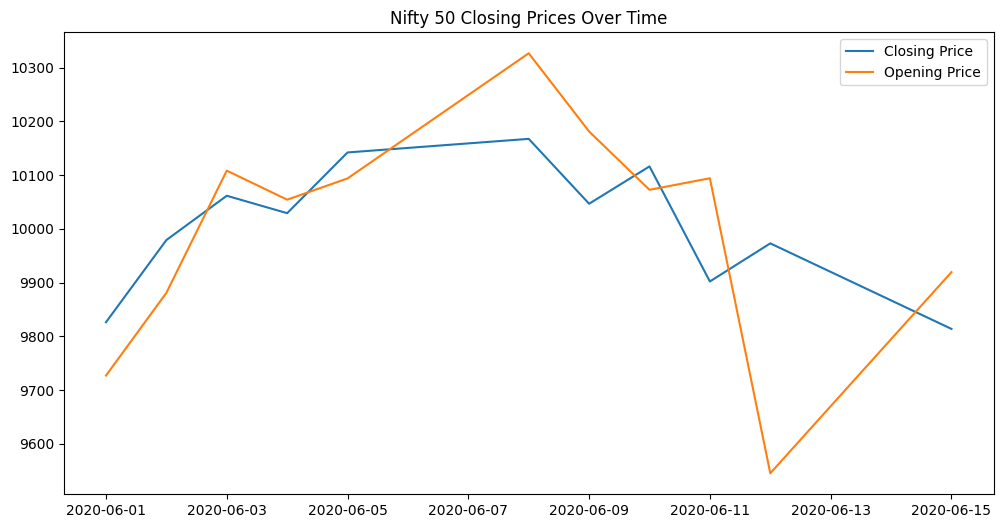

In [9]:
# Plotting to identify outliers
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(nifty_data.loc['2020-06-01':'2020-06-15','Close'], label="Closing Price")
plt.plot(nifty_data.loc['2020-06-01':'2020-06-15','Open'], label="Opening Price")
plt.title("Nifty 50 Closing Prices Over Time")
plt.legend()
plt.show()

In [10]:
# Display data summary
print("\nData Summary:\n")
print(nifty_data.describe())


Data Summary:

               Open          High           Low         Close        Volume
count   2700.000000   2700.000000   2700.000000   2700.000000  2.700000e+03
mean   11364.825725  11418.140963  11292.118393  11356.717970  2.935654e+05
std     4159.661856   4173.421486   4139.054223   4158.403861  1.950139e+05
min     5233.450195   5317.700195   5118.850098   5285.000000  0.000000e+00
25%     8172.975098   8213.499756   8123.375122   8170.649902  1.669750e+05
50%    10488.925293  10537.100098  10431.799805  10479.250000  2.316500e+05
75%    14932.824951  14990.312744  14774.962891  14907.149902  3.460500e+05
max    21737.650391  21801.449219  21678.000000  21778.699219  1.811000e+06


In [11]:
# Create a new column for the previous day's closing price
nifty_data["Close_Prev_Day"] = nifty_data["Close"].shift(1)

# Create the gap feature (current day Open - previous day Close)
nifty_data["Gap"] = nifty_data["Open"] - nifty_data["Close_Prev_Day"]

# Drop NaN values created due to the shift
nifty_data = nifty_data.dropna()

In [12]:
# Display the first few rows
nifty_data.head()

,Open,High,Low,Close,Volume,Close_Prev_Day,Gap
Date,,,,,,,
2013-01-03,6015.799805,6017.000000,5986.549805,6009.500000,0,5993.250000,22.549805
2013-01-04,6011.950195,6020.750000,5981.549805,6016.149902,0,6009.500000,2.450195
2013-01-07,6042.149902,6042.149902,5977.149902,5988.399902,0,6016.149902,26.000000
2013-01-08,5983.450195,6007.049805,5964.399902,6001.700195,0,5988.399902,-4.949707
2013-01-09,6006.200195,6020.100098,5958.450195,5971.500000,0,6001.700195,4.500000


In [13]:
nifty_data = nifty_data.assign(Day_Num=nifty_data.index.dayofweek)  # Monday=0, Sunday=6
nifty_data

,Open,High,Low,Close,Volume,Close_Prev_Day,Gap,Day_Num
Date,,,,,,,,
2013-01-03,6015.799805,6017.000000,5986.549805,6009.500000,0,5993.250000,22.549805,3
2013-01-04,6011.950195,6020.750000,5981.549805,6016.149902,0,6009.500000,2.450195,4
2013-01-07,6042.149902,6042.149902,5977.149902,5988.399902,0,6016.149902,26.000000,0
2013-01-08,5983.450195,6007.049805,5964.399902,6001.700195,0,5988.399902,-4.949707,1
2013-01-09,6006.200195,6020.100098,5958.450195,5971.500000,0,6001.700195,4.500000,2
...,...,...,...,...,...,...,...,...
2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,284700,21255.050781,40.798828,4
2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,219500,21349.400391,15.798828,1
2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,256500,21441.349609,56.300781,2


In [14]:
nifty_data = nifty_data.assign(SMA_5=nifty_data["Close"].rolling(window=5).mean())
nifty_data = nifty_data.assign(SMA_10=nifty_data["Close"].rolling(window=10).mean())

nifty_data.head(11)

,Open,High,Low,Close,Volume,Close_Prev_Day,Gap,Day_Num,SMA_5,SMA_10
Date,,,,,,,,,,
2013-01-03,6015.799805,6017.000000,5986.549805,6009.500000,0,5993.250000,22.549805,3,NaN,NaN
2013-01-04,6011.950195,6020.750000,5981.549805,6016.149902,0,6009.500000,2.450195,4,NaN,NaN
2013-01-07,6042.149902,6042.149902,5977.149902,5988.399902,0,6016.149902,26.000000,0,NaN,NaN
2013-01-08,5983.450195,6007.049805,5964.399902,6001.700195,0,5988.399902,-4.949707,1,NaN,NaN
2013-01-09,6006.200195,6020.100098,5958.450195,5971.500000,0,6001.700195,4.500000,2,5997.450000,NaN
2013-01-10,5998.799805,6005.149902,5947.299805,5968.649902,0,5971.500000,27.299805,3,5989.279980,NaN
2013-01-11,6012.399902,6018.850098,5940.600098,5951.299805,0,5968.649902,43.750000,4,5976.309961,NaN
2013-01-14,5967.200195,6036.899902,5962.149902,6024.049805,0,5951.299805,15.900391,0,5983.439941,NaN
2013-01-15,6037.850098,6068.500000,6018.600098,6056.600098,0,6024.049805,13.800293,1,5994.419922,NaN


In [15]:
# Remove rows with at least one NaN value
nifty_data = nifty_data.dropna()
nifty_data

,Open,High,Low,Close,Volume,Close_Prev_Day,Gap,Day_Num,SMA_5,SMA_10
Date,,,,,,,,,,
2013-01-16,6049.000000,6055.950195,5992.049805,6001.850098,0,6056.600098,-7.600098,2,6000.489941,5998.969971
2013-01-17,6001.250000,6053.200195,5988.100098,6039.200195,0,6001.850098,-0.600098,3,6014.600000,6001.939990
2013-01-18,6059.850098,6083.399902,6048.299805,6064.399902,0,6039.200195,20.649902,4,6037.220020,6006.764990
2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,130900,6064.399902,21.350098,0,6048.870020,6016.154980
2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,129000,6082.299805,-2.149902,1,6047.250000,6020.834961
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,284700,21255.050781,40.798828,4,21325.270313,21209.555078
2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,219500,21349.400391,15.798828,1,21329.810156,21253.980078
2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,256500,21441.349609,56.300781,2,21370.140234,21328.815039


In [16]:
# Create the target column
# 1 indicates the stock goes up (closing price increases).
# 0 indicates the stock goes down (closing price decreases).
nifty_data["UpDown"] = (nifty_data["Close"].shift(-1) > nifty_data["Close"]).astype(int)
# Drop NaN values created due to the shift
nifty_data = nifty_data.dropna()
nifty_data

,Open,High,Low,Close,Volume,Close_Prev_Day,Gap,Day_Num,SMA_5,SMA_10,UpDown
Date,,,,,,,,,,,
2013-01-16,6049.000000,6055.950195,5992.049805,6001.850098,0,6056.600098,-7.600098,2,6000.489941,5998.969971,1
2013-01-17,6001.250000,6053.200195,5988.100098,6039.200195,0,6001.850098,-0.600098,3,6014.600000,6001.939990,1
2013-01-18,6059.850098,6083.399902,6048.299805,6064.399902,0,6039.200195,20.649902,4,6037.220020,6006.764990,1
2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,130900,6064.399902,21.350098,0,6048.870020,6016.154980,0
2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,129000,6082.299805,-2.149902,1,6047.250000,6020.834961,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,284700,21255.050781,40.798828,4,21325.270313,21209.555078,1
2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,219500,21349.400391,15.798828,1,21329.810156,21253.980078,1
2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,256500,21441.349609,56.300781,2,21370.140234,21328.815039,1


In [17]:
# nifty_data.to_csv('feature_extraction_nifty_data.csv')

In [18]:
nifty_data.corrwith(nifty_data["UpDown"])

Open              0.010172
High              0.010595
Low               0.010556
Close             0.011197
Volume            0.026316
Close_Prev_Day    0.009219
Gap               0.056688
Day_Num           0.022512
SMA_5             0.009580
SMA_10            0.009138
UpDown            1.000000
dtype: float64